# Swarnadeep Bhar
# MCS201802
# Assignment 1

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import chardet

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
with open("/home/swarnadeep/Documents/Courses/2nd_Sem/AML/SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
print(result['encoding'])
df_raw = pd.read_csv("/home/swarnadeep/Documents/Courses/2nd_Sem/AML/SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

utf-8


In [7]:
df_raw.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df=df_raw[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [9]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.drop_duplicates(subset="sms",inplace=True)

In [12]:
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,A guy who gets used but is too dumb to realize...
freq,4516,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df['sms']

In [15]:
y=df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [18]:
train_corpus = list(X_train)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# LOGISTIC REGRESSION:

In [22]:
"""
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is 
dichotomous (binary). 
Like all regression analyses, the logistic regression is a predictive analysis.  
Logistic regression is used to describe data and to explain the relationship between one dependent 
binary variable and one or 
more nominal, ordinal, interval or ratio-level independent variables.

Sometimes logistic regressions are difficult to interpret; 
the Intellectus Statistics tool easily allows you to conduct the analysis, 
then in plain English interprets the output
"""
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logistic_regression)])

In [23]:
#Cross Validation Score
cv_score_regression = cross_val_score(pipeline, X_train, y_train, cv=5).mean()
print("The cross validation score for Logistic Regression is:")
print(cv_score_regression)

The cross validation score for Logistic Regression is:
0.9618164025542468


In [24]:
def set_binary_labels(label):
    if label == 'ham':
        return 1
    else:
        return 0

Accuracy:  0.9675174013921114
Precision:  0.9663793103448276
Recall:  0.9973309608540926
F1 score:  0.9816112084063049
The precision recall curve


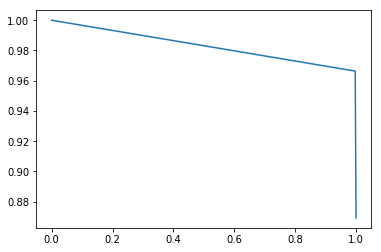

In [25]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

# Naive Bayes

In [26]:
"""
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. 
The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. 
Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and 
calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where 
this assumption does not hold.
"""
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', naive_bayes)])

In [27]:
#Cross Validation Score
cv_score_naive_bayes = cross_val_score(pipeline_bayes, X_train, y_train, cv=5).mean()
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
0.947108374172581


Accuracy:  0.9590100541376644
Precision:  0.9549702633814783
Recall:  1.0
F1 score:  0.9769665362885701
The precision recall curve


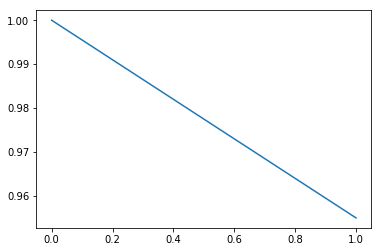

In [28]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_bayes.fit(X_train, y_train)
y_predicted = pipeline_bayes.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

# Decision Tree

In [29]:
"""
Decision tree builds classification or regression models in the form of a tree structure. 
It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 
The final result is a tree with decision nodes and leaf nodes. 
A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). 
Leaf node (e.g., Play) represents a classification or decision. 
The topmost decision node in a tree which corresponds to the best predictor called root node. 
Decision trees can handle both categorical and numerical data.
"""

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
pipeline_decision_tree = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', decision_tree)])

In [30]:
#Cross Validation Score
cv_score_decision_tree = cross_val_score(pipeline_decision_tree, X_train, y_train, cv=5).mean()
print("The cross validation score for Decison Tree is:")
print(cv_score_decision_tree)

The cross validation score for Decison Tree is:
0.9584648885589095


Accuracy:  0.9535962877030162
Precision:  0.9683098591549296
Recall:  0.9786476868327402
F1 score:  0.9734513274336283
The precision recall curve


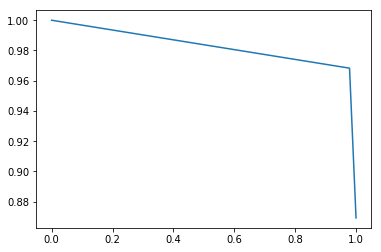

In [31]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_decision_tree.fit(X_train, y_train)
y_predicted = pipeline_decision_tree.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

# Random Forest

In [32]:
"""
Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. 
The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. 
The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to 
get a more accurate and stable prediction.

One big advantage of random forest is, 
that it can be used for both classification and regression problems, 
which form the majority of current machine learning systems. 
I will talk about random forest in classification, 
since classification is sometimes considered the building block of machine learning.
"""

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', random_forest)])

In [33]:
#Cross Validation Score
cv_score_random_forest = cross_val_score(pipeline_forest, X_train, y_train, cv=5).mean()
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
0.9667179690111531


Accuracy:  0.9651972157772621
Precision:  0.9638865004299226
Recall:  0.9973309608540926
F1 score:  0.9803235679930039
The precision recall curve is:


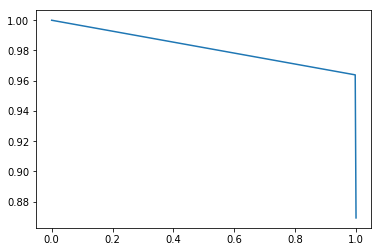

In [34]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_forest.fit(X_train, y_train)
y_predicted = pipeline_forest.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)